## Introduction
<b><p style="font-size: XX-large"><font color = "green">Andrew Cai (cai.and@northeastern.edu)</font></p></b> </div>
<b><p style="font-size: XX-large"><font color = "green">DS5010 Final Project</font></p></b> </div>
<b><p style="font-size: XX-large"><font color = "green">April 19, 2024</font></p></b> </div>

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext pycodestyle_magic
%pycodestyle_on

-------------------------

## Data Set Background

This dataset contains a list of apartment availabilities from December 2008 to December 2009. It contains 22 features about a apartment along with 100000 records. The dataset has been cleaned a bit ahead of time so that Price and Square_Feet attributes are not empty. In this project the dataset was processed to mainly focus on key attributes such as 

- Amenities (Nice add-ons to an apartment/complex)
- Bathrooms (Number of bathrooms)
- Bedrooms (Number of bedrooms)
- Fee (How much the sign-on fee)
- Photo (Photo presence of listing at souce)
- Pets (Type of pets allowed)
- Price (Rental Price in USD)
- Square footage (Size of the apartment)
- City (City of apartment record)
- State (State of apartment record)
- Source (Where the record was taken from)
- Time (When the record was created)

While there are other features, those additional features did not seem to add value for the scope of the project such as the longitude and latitude of a record when we rather focus on the city and state.

With this data, insights will be gathered on critical factors in affecting apartment rentals and also providing guidance on optimal situations for clients such as best time to look for apartments or cities that have high rents.

UCI ML Repository: [Apartment for Rent Classified](https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified)

Apartment for Rent Classified. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5X623.

-------------------------

## Data Wrangling

### Extraction

In [2]:
# df stores the datset from UCI ML Repo
df = pd.read_csv('apartments_for_rent_classified_100K.csv',
                 dtype={'address': str}, sep=";", encoding='cp1252')
df.sample(5)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
77820,5197945367,housing/rent/apartment,"Apartment in quiet area, spacious with big kit...",Welcome to luxurious living and exceptional lo...,"Fireplace,Pool",1.0,1.0,USD,No,Thumbnail,...,"$1,075",Monthly,772,NaN,Frisco,TX,33.1523,-96.8499,RentDigs.com,1550831491
19728,5508900805,housing/rent/apartment,"Two BR, Two BA, 1,224 sq. ft. - must see to be...","Square footage: 1224 square feet, unit number:...","Gym,Pool",2.0,2.0,USD,No,Yes,...,"$1,500",Monthly,1224,NaN,Kissimmee,FL,28.2966,-81.6162,RentDigs.com,1568760443
59834,5198433409,housing/rent/apartment,"Attractive Two BR, Two BA. Single Car Garage!",Are you ready for luxurious without the commut...,"Dishwasher,Gated,Gym,Parking,Pool,Refrigerator,TV",2.0,2.0,USD,No,Yes,...,"$1,260",Monthly,848,NaN,Newport News,VA,36.9886,-76.4202,RentDigs.com,1550851482
63885,5198335228,housing/rent/apartment,Tucson Value. $670/mo,Price from: 670. Welcome home to Tierra Hills ...,"Clubhouse,Dishwasher,Parking,Patio/Deck,Refrig...",1.0,1.0,USD,No,Thumbnail,...,$670,Monthly,658,NaN,Tucson,AZ,32.0810,-111.0958,RentDigs.com,1550846362
8984,5509097729,housing/rent/apartment,Beautiful Four BR apartment just 5 minute walk...,"apartment has 4 beds, family room, dedicated d...","Dishwasher,Patio/Deck,Washer Dryer",1.0,4.0,USD,No,Yes,...,"$1,700",Monthly,1750,NaN,Keene,NH,42.9367,-72.2863,RentDigs.com,1568773237


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

Some initial issues with the dataset that need to be addressed:
- Non-Null counts are not equal between all features
- Dropping unncessary columns such as latitude, longitude, etc.
- Adjusting the datatype of time to a datetime

### Data Cleaning and Preprocessing

Start by investigating the columns with the null values which are 
- amenities
- bathrooms
- bedrooms
- pets_allowed
- price
- price display
- address
- cityname
- state
- latitude
- longitude

In [4]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [5]:
df[['currency', 'fee', 'price', 'price_display', 'price_type']].sample(5)

,currency,fee,price,price_display,price_type
57131,USD,No,2268.0,"$2,268",Monthly
4835,USD,No,1095.0,"$1,095",Monthly
8715,USD,No,1321.0,"$1,321",Monthly
77326,USD,No,675.0,$675,Monthly
39283,USD,No,1294.0,"$1,294",Monthly


As we can see, the price_display is not a helpful column since it's the same as price, but processing this string/numeric datatype will be difficult and is best dropped

In [6]:
df[['currency', 'fee', 'price_type',
    'has_photo', 'category', 'source']].nunique()

currency       1
fee            2
price_type     3
has_photo      3
category       7
source        25
dtype: int64

In [7]:
df.sample()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
30206,5508779866,housing/rent/apartment,Apartment in move in condition in Las Vegas,"Square footage: 871 square feet, unit number: ...","Clubhouse,Gym,Pool,TV",1.0,1.0,USD,No,Thumbnail,...,"$1,149",Monthly,871,NaN,Las Vegas,NV,36.2811,-115.3036,RentDigs.com,1568751959


There is only one type of currency, so that column isn't helpful since it's only saying all rental prices are in USD. Along with currency and price_display, we will drop:
- id: Too many unique identifiers that doesn't provide insightful
- title: For this project we will not look at a title of a listing
- body: Apartment description, but too inconsistent to gain useful insights
- address: There are too many missing addresses, but for the scope of this project we want to know the general location
- latitude and longitude: Too hyper-specific of a record that is unncessary

In [8]:
# df2 will be the main df analyzed
df2 = df.copy().drop(['id',
                      'title',
                      'body',
                      'currency',
                      'price_display',
                      'address',
                      'latitude',
                      'longitude'
                      ], axis=1)

Remaining features will null-values that are kept:
- amenities
- bathrooms
- bedrooms
- pets_allowed
- price
- cityname
- state

In [9]:
df2.isnull().sum()

category            0
amenities       16044
bathrooms          63
bedrooms          124
fee                 0
has_photo           0
pets_allowed    60424
price               1
price_type          0
square_feet         0
cityname          302
state             302
source              0
time                0
dtype: int64

Let's take a look at the unique values in each column/columns in question still

In [10]:
df2.nunique()

category            7
amenities        9827
bathrooms          16
bedrooms           10
fee                 2
has_photo           3
pets_allowed        4
price            3687
price_type          3
square_feet      2538
cityname         2979
state              51
source             25
time            75360
dtype: int64

Attributes category, fee, has_photo, pets_allowed, and price_type needs a bit more investigating of the types of values are present

In [11]:
df2[['category', 'fee', 'has_photo',
     'pets_allowed', 'price_type']].value_counts()

category                        fee  has_photo  pets_allowed    price_type    
housing/rent/apartment          No   Yes        Cats,Dogs       Monthly           19862
                                     Thumbnail  Cats,Dogs       Monthly           14694
                                     No         Cats,Dogs       Monthly            2474
                                     Thumbnail  Cats            Monthly             872
                                     Yes        Cats            Monthly             834
                                     No         Cats            Monthly             137
                                     Thumbnail  Dogs            Monthly             127
                                Yes  Thumbnail  Cats,Dogs       Monthly              50
                                     No         Cats,Dogs       Monthly               9
housing/rent                    No   Yes        Cats,Dogs       Monthly               2
housing/rent/home               No   Thum

From these value counts of these features, the following record will be cleaned out:
- pets_allowed should not be Cats,Dogs,None since None doesn't make sense
- 'category' should not be only housing/rent since we don't know what type of rental it is
- price_type should only be Monthly for the scope of this project/it has the most dominant number of records

In [12]:
df2 = df2.loc[df2['pets_allowed'] != 'Cats,Dogs,None']
df2 = df2.loc[df2['category'] != 'housing/rent']
df2 = df2.loc[df2['price_type'] == 'Monthly']

Taking a deeper look at catgory, we only want to focus on housing/rent/apartment for apartment listings only

In [13]:
df2['category'].value_counts()

category
housing/rent/apartment            99426
housing/rent/commercial/retail       42
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

In [14]:
df2 = df2[df2['category'] == 'housing/rent/apartment']

Furthermore, price_type now is no longer needed since all records now are considered Monthly

In [15]:
df2['price_type'].value_counts()

price_type
Monthly    99426
Name: count, dtype: int64

In [16]:
df2.drop('price_type', axis=1, inplace=True)

Taking another look at the remaining missing entry records

In [17]:
df2.isnull().sum()

category            0
amenities       16041
bathrooms          61
bedrooms          123
fee                 0
has_photo           0
pets_allowed    60367
price               1
square_feet         0
cityname          302
state             302
source              0
time                0
dtype: int64

We will assume the worst-case for apartments and if the amenities/pets_allowed are missing, then we will list those entries as Not Listed

In [18]:
df2['amenities'] = df2['amenities'].fillna('Not Listed')
df2['pets_allowed'] = df2['pets_allowed'].fillna('Not Listed')

For the rest of the missing entries for bathrooms, bedrooms, price, cityname, and state, we will drop them since those are too critical to make any assumptions to fill the missing entries

In [19]:
df2.dropna(inplace=True)
df2.isnull().sum()

category        0
amenities       0
bathrooms       0
bedrooms        0
fee             0
has_photo       0
pets_allowed    0
price           0
square_feet     0
cityname        0
state           0
source          0
time            0
dtype: int64

Checking for duplicated data, there are several records, so we will drop them

In [20]:
df2.duplicated().sum()

130

In [21]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

After the clean up, we still have a decent amount of our data remaining which is about ~98.81 % of it

In [22]:
round((len(df2)/100000)*100, 2)

98.81

### Feature Engineering

fee, has_photo, and pets_allowed are features that are deemed to be more boolean/boolean-like

In [23]:
df2[['fee', 'has_photo', 'pets_allowed']].value_counts()

fee  has_photo  pets_allowed
No   Yes        Not Listed      35026
                Cats,Dogs       19772
     Thumbnail  Not Listed      18255
                Cats,Dogs       14594
     No         Not Listed       6558
                Cats,Dogs        2455
     Thumbnail  Cats              866
     Yes        Cats              828
     No         Cats              137
     Thumbnail  Dogs              126
Yes  Thumbnail  Not Listed        117
                Cats,Dogs          48
     Yes        Not Listed         18
     No         Cats,Dogs           9
                Not Listed          4
Name: count, dtype: int64

These features will be converted into new columns that are boolean in nature

In [24]:
df2['Has Photo'] = df2['has_photo'].apply(lambda x: x == 'Yes' or
                                          x == 'Thumbnail')
df2['Pet Listed'] = df2['pets_allowed'].apply(lambda x: x != 'Not Listed')
df2['Fee'] = df2['fee'].apply(lambda x: x == 'Yes')
df2 = df2.drop(['category', 'fee', 'has_photo', 'pets_allowed'], axis=1)

Now taking a look at the time attribute, we can see that this is not readable in its current form

In [25]:
df2['time'].sample(5)

11114    1568758206
8900     1568776254
78031    1550827320
91585    1544213802
19352    1568772886
Name: time, dtype: int64

A new column Date Time be generated to convert the time column into a year-month-day format. We will then drop the old time column

In [26]:
df2['Date Time'] = pd.to_datetime(df2['time'], unit='s', origin='1960-1-1')

In [27]:
df2.drop(['time'], axis=1, inplace=True)
df2['Date Time'].sample(5)

80147   2009-02-21 16:35:42
53379   2009-02-21 15:26:32
85110   2008-12-06 16:04:15
41243   2009-09-16 21:56:36
45625   2009-09-16 19:45:47
Name: Date Time, dtype: datetime64[ns]

In [28]:
df2['Date Time'].min(), df2['Date Time'].max()

(Timestamp('2008-12-06 09:20:18'), Timestamp('2009-12-25 20:17:05'))

Features remaining will be renamed for better readability

In [29]:
%pycodestyle_off
df2.rename(columns={'amenities':'Amenities',
                    'bathrooms': 'Bathrooms',
                    'bedrooms': 'Bedrooms',
                    'price': 'Price ($)',
                    'square_feet': 'Square Footage',
                    'cityname': 'City',
                    'state':'State',
                    'source': 'Source'
                    }, inplace=True)
%pycodestyle_on

The index now is all over the place and needs to be reset

In [30]:
df2.sample(5)

,Amenities,Bathrooms,Bedrooms,Price ($),Square Footage,City,State,Source,Has Photo,Pet Listed,Fee,Date Time
22668,"Gated,Parking,Patio/Deck,Storage,Washer Dryer",1.0,1.0,2965.0,1077,Los Angeles,CA,RentDigs.com,True,False,False,2009-09-16 21:03:40
2635,"Dishwasher,Garbage Disposal,Parking,Pool,Refri...",1.0,1.0,849.0,714,Houston,TX,RentLingo,True,True,False,2009-12-25 11:04:08
43121,Not Listed,1.0,1.0,595.0,558,Dallas,TX,RentDigs.com,True,False,False,2009-09-16 22:22:45
38565,Pool,1.0,1.0,1659.0,710,Chapel Hill,NC,RentDigs.com,True,False,False,2009-09-16 22:08:28
91571,"Gym,Pool",2.5,2.0,2312.0,1335,Laurel,MD,RentDigs.com,True,True,False,2008-12-06 21:28:59


In [31]:
df2.reset_index(inplace=True)

From the data wrangling and feature engineering, our dataset is now ready to be analyzed

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98813 entries, 0 to 98812
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           98813 non-null  int64         
 1   Amenities       98813 non-null  object        
 2   Bathrooms       98813 non-null  float64       
 3   Bedrooms        98813 non-null  float64       
 4   Price ($)       98813 non-null  float64       
 5   Square Footage  98813 non-null  int64         
 6   City            98813 non-null  object        
 7   State           98813 non-null  object        
 8   Source          98813 non-null  object        
 9   Has Photo       98813 non-null  bool          
 10  Pet Listed      98813 non-null  bool          
 11  Fee             98813 non-null  bool          
 12  Date Time       98813 non-null  datetime64[ns]
dtypes: bool(3), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.8+ MB


-------------------------

## Data Modeling and Analysis

### Questions Using Defined Functions

#### 1) What are the cities with the highest and lowest rents?

In [33]:
def maxminrent(data):
    """Takes a dataframe and displays cities
       with highest and lowest rent

       Args:
           data (pandas dataframe): datframe with a Price ($)

       Returns:
           max, min (int): city with the highest rent and lowest rent
    """
    # df stores a copy of data
    df = data.copy()
    df['CS'] = df.apply(lambda x: x['City'] + ', ' + x['State'], axis=1)
    # max stores the max rent and the city
    max = [df.groupby(df['CS'])['Price ($)'].mean().idxmax(),
           df.groupby(df['CS'])['Price ($)'].mean().max()]
    # min stores the minimum rent and the city
    min = [df.groupby(df['CS'])['Price ($)'].mean().idxmin(),
           df.groupby(df['CS'])['Price ($)'].mean().min()]
    return max, min

In [34]:
# mm stores maxminrent returns of df2
mm = maxminrent(df2)
print(f'City with highest monthly rent is {mm[0][0]} of ${mm[0][1]:0.2f}')
print(f'City with lowest monthly rent is {mm[1][0]} of ${mm[1][1]:0.2f}')

City with highest monthly rent is Snowmass Village, CO of $30000.00
City with lowest monthly rent is Mount Airy, MD of $200.00


#### 2) What are the details of the apartments that has the most and least amenities?

In [35]:
def ammaxmin(data):
    """Apartment details with the least and most amenities
       (the first occurences of the value)

    Args:
        data (pandas dataframe): dataframe with an amenities column

    Returns:
        data index: pandas iloc of aprtment with least and most amenities
    """
    # df is a copy of data
    df = data.copy()
    df['Total Amenities'] = df['Amenities'].apply(lambda x: len(x.split(','))
                                                  if x != 'Not Listed' else 0)
    return (df.iloc[df['Total Amenities'].argmax()],
            df.iloc[df['Total Amenities'].argmin()])

In [36]:
print('Apartment with most amenities:')
ammaxmin(df2)[0]

Apartment with most amenities:


index                                                           7697
Amenities          AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...
Bathrooms                                                        2.0
Bedrooms                                                         3.0
Price ($)                                                     1420.0
Square Footage                                                  1155
City                                                       Las Vegas
State                                                             NV
Source                                                  RentDigs.com
Has Photo                                                       True
Pet Listed                                                     False
Fee                                                            False
Date Time                                        2009-09-16 18:48:25
Total Amenities                                                   18
Name: 7570, dtype: object

In [37]:
print('Apartment with least amenities:')
ammaxmin(df2)[1]

Apartment with least amenities:


index                                0
Amenities                   Not Listed
Bathrooms                          1.0
Bedrooms                           1.0
Price ($)                       2195.0
Square Footage                     542
City                     Redondo Beach
State                               CA
Source                       RentLingo
Has Photo                         True
Pet Listed                        True
Fee                              False
Date Time          2009-12-25 11:39:15
Total Amenities                      0
Name: 0, dtype: object

#### 3) What is the average number of bedrooms and bathrooms in California?

In [38]:
def bavg(data, state):
    """Takes a dataframe and state and calculates average number
       of bedrooms and bathrooms for apartment records

    Args:
        data (pandas dataframe): dataframe with a 'State'
        state (str): capitalized two letter abbrev or US State

    Returns:
        tuple: bedroom and bathroom average
    """
    # df stores a copy of data
    df = data.copy()
    # bdavg stores average number of bedrooms
    bdavg = df.groupby('State')['Bedrooms'].mean().round(2)
    # baavg stores average number of bathrooms
    baavg = df.groupby('State')['Bathrooms'].mean().round(2)
    return bdavg[state], baavg[state]

In [39]:
# bv stores bavg for California
bv = bavg(df2, 'CA')
print(f'The average number of bedrooms in California is {bv[0]}')
print(f'The average number of bathrooms in California is {bv[1]}')

The average number of bedrooms in California is 1.66
The average number of bathrooms in California is 1.46


#### 4) What are the top 10 cities in California greatest number of properties that are $2000 or less?

In [40]:
def numrent(data, rent, state):
    """Given rent and state, will provide top 10 cities
       with highest record counts in criteria

    Args:
        data (pandas dataframe): data frame with Price ($) and State
        rent (float or int): max rent value
        state (str): Two letter abbreviation of US state

    Returns:
        pandas series:top 10 city counts
    """
    # df stores a copy of data and masking
    df = data.copy()
    df = df.loc[df['Price ($)'] <= rent]
    # grouped stores the remaining cities due to mask and top top of them
    grouped = df.groupby([df['State'], df['City']]).size()
    # gdf stores dataframe of grouped
    gdf = pd.DataFrame(grouped[state].nlargest(10)).reset_index()
    gdf.rename(columns={0: 'Total Records'}, inplace=True)
    return gdf

In [41]:
print('The Top 10 Cities in California are:')
numrent(df2, 2000, 'CA')

The Top 10 Cities in California are:


,City,Total Records
0,Los Angeles,480
1,Sacramento,292
2,Long Beach,225
3,San Diego,190
4,Riverside,182
5,Moreno Valley,121
6,San Bernardino,89
7,Irvine,67
8,Victorville,66
9,Palm Springs,63


#### 5) What are the cities with the most/least optimal SqFt per Dollar in Washington?

In [42]:
def optsqft(data, state):
    """Given a state, provides SqFt/$ calculation or best and worst city

    Args:
        data (pandas dataframe): dataframe with State,
                                 Square Footage, and Price ($)
        state (str): Two letter abbreviation of US State

    Returns:
        tuple: max/min calculations with cities for SqFt/$
    """
    # df stores a copy of data
    df = data.copy()
    df['SqFt per $'] = df.apply(lambda x:
                                x['Square Footage'] / x['Price ($)'], axis=1)
    # sqdol stores groupby for average SqFt/$ of each city and state mask
    sqdol = df.groupby([df['State'], df['City']])['SqFt per $'].mean()
    return ([sqdol[state].idxmax(), sqdol[state].max().round(2)],
            [sqdol[state].idxmin(), sqdol[state].min().round(2)])

In [43]:
# os stores return of optsqft of WA
os = optsqft(df2, 'WA')
print(f'In Washington, {os[0][0]}'
      f' has the most optimal SqFt/$ of {os[0][1]:0.2f}')
print(f'In Washington, {os[1][0]}'
      f' has the least optimal SqFt/$ of {os[1][1]:0.2f}')

In Washington, Freeland has the most optimal SqFt/$ of 1.19
In Washington, Seatac has the least optimal SqFt/$ of 0.30


### Pandas and NumPy Utilization

#### 6) What is the average rent by state alphabetically?

In [44]:
print('First Half of States:')
df2.groupby('State', as_index=False)['Price ($)'].mean().round(2)[:26]

First Half of States:


,State,Price ($)
0,AK,1054.28
1,AL,962.18
2,AR,874.04
3,AZ,1119.38
4,CA,2465.98
5,CO,1555.35
6,CT,1268.34
7,DC,2226.80
8,DE,1154.86
9,FL,1575.07


In [45]:
print('Second Half of States:')
df2.groupby('State', as_index=False)['Price ($)'].mean().round(2)[26:]

Second Half of States:


,State,Price ($)
26,MT,1118.34
27,NC,1153.10
28,ND,945.83
29,NE,933.35
30,NH,1453.73
31,NJ,2038.44
32,NM,844.04
33,NV,1173.53
34,NY,2531.58
35,OH,1109.97


#### 7) What city has the most apartments with fees?

In [46]:
# fcs stores city with most number of fees
fcs = df2.groupby(['City', 'State'])['Fee'].sum().idxmax()
# fl provides the number of fees of city
fl = df2.groupby(['City', 'State'])['Fee'].sum().max()

print(f'{fcs[0]}, {fcs[1]} has the most apartment records'
      f' with fees which total to {fl}')

Boston, MA has the most apartment records with fees which total to 50


#### 8) Average rent difference between listings that allow pets versus the ones that do not?

In [47]:
# petgr stores groupby of df2 for Pets Listed
petgr = df2.groupby('Pet Listed')['Price ($)'].mean().round(2)
print(f'Average rent for pets allowed: ${petgr[True]:0.2f}')
print(f'Average rent for no pets allowed: ${petgr[False]:0.2f}')

Average rent for pets allowed: $1464.53
Average rent for no pets allowed: $1565.10


#### 9) In the dataset, how many records have pictures versus none?

In [48]:
# havpic stores percentage of records with a photo
havpic = np.sum(df2['Has Photo'] / len(df2)*100).round(2)
print(f'{havpic:0.2f}% of records have photos of apartment')
print(f'{100-havpic:0.2f}% of records have no photos of apartment')

90.73% of records have photos of apartment
9.27% of records have no photos of apartment


#### 10) What percentage do top 10 cities of listing counts make up the available units?

In [49]:
# groupcs stores groupby of city and state rental counts of top 10
groupcs = df2.groupby(['City', 'State']).size().nlargest(10)
# groupcsp stores the percentage make up of total of top 10
groupcsp = ((groupcs.sum() / len(df2))*100).round(2)
# groupcsdf stores dataframe of groupcs
%pycodestyle_off
groupcsdf = pd.DataFrame(groupcs).reset_index().rename(columns={0:'Total Records'})
%pycodestyle_on

print(f'The Top 10 Cities Make Up {groupcsp:0.2f}% of All Listings')
print('\nThe Top 10 Cities with Most Number of Rentals are:')
groupcsdf

The Top 10 Cities Make Up 16.17% of All Listings

The Top 10 Cities with Most Number of Rentals are:


,City,State,Total Records
0,Dallas,TX,2819
1,Denver,CO,2741
2,Los Angeles,CA,2397
3,Las Vegas,NV,1843
4,Atlanta,GA,1503
5,Charlotte,NC,1121
6,Richmond,VA,897
7,Arlington,VA,896
8,Alexandria,VA,889
9,San Antonio,TX,873


In [50]:
# df2c stores copy of df2
df2c = df2.copy()
df2c['City,State'] = df2c['City'] + ',' + df2['State']
df2c['City,State'].nunique()

3548

#### 11) What is the most common source for each state of their apartment listings?

In [51]:
print('Most Common Source by State:')
# ssg stores df2 state max count source by state
ssg = df2.groupby('State',
                  sort=True).apply(lambda x:
                                   x['Source'].value_counts().idxmax(),
                                   include_groups=False)
# ssgdf stores dataframe of ssg
ssgdf = pd.DataFrame(ssg).reset_index()
%pycodestyle_off
ssgdf.rename(columns={0:'Source'}, inplace=True)
%pycodestyle_on
ssgdf

Most Common Source by State:


,State,Source
0,AK,RentLingo
1,AL,RentDigs.com
2,AR,RentDigs.com
3,AZ,RentDigs.com
4,CA,RentDigs.com
5,CO,RentDigs.com
6,CT,RentDigs.com
7,DC,RentLingo
8,DE,RentLingo
9,FL,RentDigs.com


In [52]:
print(df2['Source'].nunique(), 'Unique Sources')
print('\nMost Common Sources: ')
ssgdf['Source'].value_counts()

25 Unique Sources

Most Common Sources: 


Source
RentDigs.com    44
RentLingo        7
Name: count, dtype: int64

#### 12) How many records satisfy the average family in America of 2400 Square Feet and $1500 monthly rent?

https://www.rocketmortgage.com/learn/how-big-of-a-house-do-i-need#:~:text=The%20Number%20Of%20People%20In,homes%20around%202%2C400%20square%20feet.

https://www.businessinsider.com/what-the-average-american-family-spends-on-rent-in-us-2019-6

In [53]:
# avam stores total number of records that satisfy average criteria
avam = len(df2.loc[(df2['Square Footage'] >= 2400)
                   & (df2['Price ($)'] <= 1500)])
print(f'{avam} listings of {len(df2)} satisfy the average family in America')

48 listings of 98813 satisfy the average family in America


#### 13) Details of the smallest and largest apartments?

In [54]:
print('Smallest Apartment Details:')
df2.iloc[df2['Square Footage'].idxmin()]

Smallest Apartment Details:


index                            4998
Amenities                  Not Listed
Bathrooms                         1.0
Bedrooms                          0.0
Price ($)                      1390.0
Square Footage                    107
City                        Arlington
State                              VA
Source                      RentLingo
Has Photo                        True
Pet Listed                      False
Fee                             False
Date Time         2009-12-25 11:23:30
Name: 4972, dtype: object

In [55]:
print('Largest Apartment Details:')
df2.iloc[df2['Square Footage'].idxmax()]

Largest Apartment Details:


index                                          50964
Amenities         Elevator,Parking,Pool,Refrigerator
Bathrooms                                        1.0
Bedrooms                                         0.0
Price ($)                                      565.0
Square Footage                                 12000
City                                          Euclid
State                                             OH
Source                                     ListedBuy
Has Photo                                       True
Pet Listed                                      True
Fee                                            False
Date Time                        2009-07-05 14:05:45
Name: 50595, dtype: object

#### 14) What are the top 10 cities with the highest ranges of square footage and monthly rent?

In [56]:
# group14 stores group by city state of square footage range
group14 = df2.groupby(['City',
                       'State'])['Square Footage'].agg(np.ptp).nlargest(10)
# g14 stores dataframe of group14
g14 = pd.DataFrame(group14).reset_index()
%pycodestyle_off
g14.rename(columns={'Square Footage': 'Square Footage Range'}, inplace=True)
%pycodestyle_on
print('Top 10 Cities with Greatest Square Footage Range:')
g14

Top 10 Cities with Greatest Square Footage Range:


,City,State,Square Footage Range
0,Euclid,OH,11477
1,Potomac,MD,11068
2,Steubenville,OH,9147
3,Los Angeles,CA,9031
4,Beverly Hills,CA,6845
5,Annandale,VA,6384
6,Playa Del Rey,CA,6381
7,Montecito,CA,6316
8,West Hollywood,CA,6004
9,Chicago,IL,5775


In [57]:
# group142 stores monthly rent range by city and state
group142 = df2.groupby(['City',
                        'State'])['Price ($)'].agg(np.ptp).nlargest(10)
# g142 stores dataframe of group142
g142 = pd.DataFrame(group142).reset_index()
%pycodestyle_off
g142.rename(columns={'Price ($)': 'Monthly Rent Range'},  inplace=True)
%pycodestyle_on
print('Top 10 Cities with Greatest Monthly Rent Range:')
g142

Top 10 Cities with Greatest Monthly Rent Range:


,City,State,Monthly Rent Range
0,Barstow,CA,52005.0
1,Los Angeles,CA,39100.0
2,West Hollywood,CA,33185.0
3,Pacific Palisades,CA,30567.0
4,Venice,CA,27705.0
5,Beverly Hills,CA,27305.0
6,Bonita Springs,FL,23900.0
7,Playa Del Rey,CA,23015.0
8,San Francisco,CA,18100.0
9,Montecito,CA,17800.0


#### 15) Apartments listed that do not/barely meet legal requirements of at least 120 square feet and 1 bathroom?

https://worldpopulationreview.com/state-rankings/minimum-house-size-by-state 

https://up.codes/s/water-closet-and-bath-accommodations 

In [58]:
print('Apartments that are Questionable:')
df2.loc[(df2['Square Footage'] < 120)
        | (df2['Bathrooms'] == 0)]

Apartments that are Questionable:


,index,Amenities,Bathrooms,Bedrooms,Price ($),Square Footage,City,State,Source,Has Photo,Pet Listed,Fee,Date Time
4972,4998,Not Listed,1.0,0.0,1390.0,107,Arlington,VA,RentLingo,True,False,False,2009-12-25 11:23:30
6465,6567,Not Listed,1.0,0.0,925.0,116,Seattle,WA,RentLingo,True,False,False,2009-12-17 11:15:43


### Visualizations Using Matplotlib and Seaborn

#### 16) Do the total amount of bedrooms and bathrooms scale with pricing?

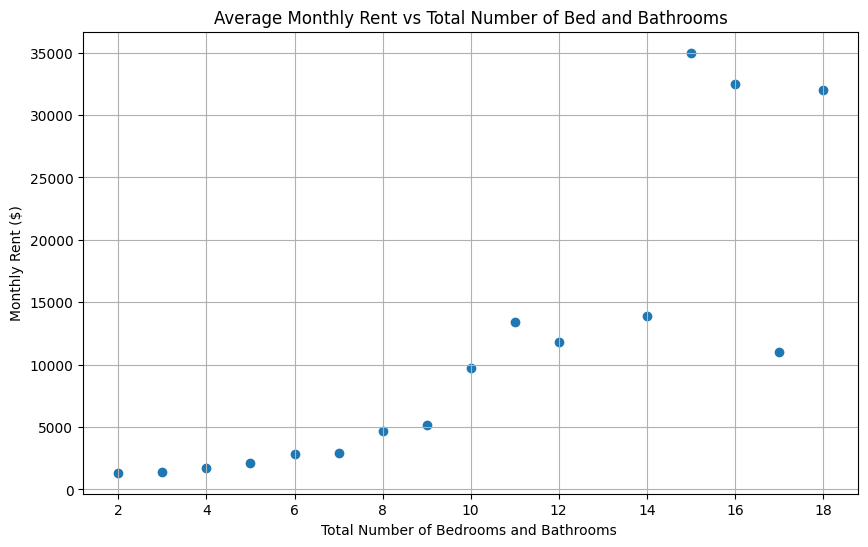

In [59]:
df2['BR Totals'] = df2['Bathrooms'] + df2['Bathrooms']
df2['BR Totals'] = df2['BR Totals'].astype(int)
# brt stores groupby of average monthly rent with bath/bed totals
brt = df2.groupby(df2['BR Totals'])['Price ($)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(brt.index, brt)

plt.ylabel('Monthly Rent ($)')
plt.xlabel('Total Number of Bedrooms and Bathrooms ')
plt.grid(True)
%pycodestyle_off
plt.title('Average Monthly Rent vs Total Number of Bed and Bathrooms');
%pycodestyle_on

In general, the rent does scale with the total number of bathrooms and bedrooms. It's interesting, that we see a few points dip on the right side of the graph, but this is most likely due to a smaller sample size of large living spaces. Most accurate is at 11 total bath/bedrooms and it seems to scale exponentially.

#### 17) What time of the year is rent the most expensive to sign-on?

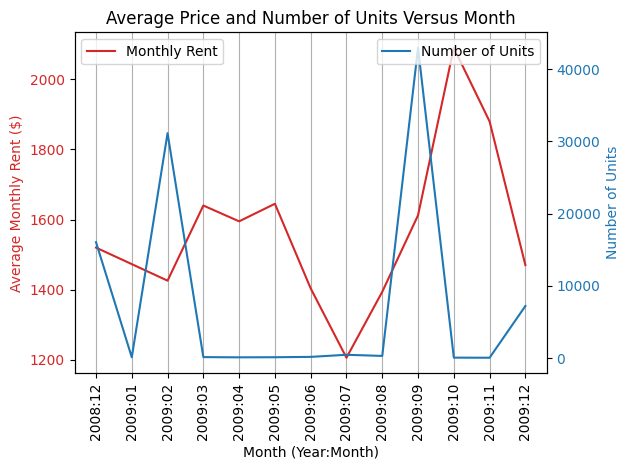

In [60]:
# gar stores year and month average rent
gar = df2.groupby([df2['Date Time'].dt.year,
                   df2['Date Time'].dt.month])['Price ($)'].mean().round(2)
# gtot stores year and month total listings
gtot = df2.groupby([df2['Date Time'].dt.year,
                    df2['Date Time'].dt.month]).size()
# xtime stores custom xtick labels
xtime = ['2008:12',
         '2009:01',
         '2009:02',
         '2009:03',
         '2009:04',
         '2009:05',
         '2009:06',
         '2009:07',
         '2009:08',
         '2009:09',
         '2009:10',
         '2009:11',
         '2009:12']

# fig and ax1 stores subplot objects
fig, ax1 = plt.subplots()

# color stores custom plot color for ax1
color = 'tab:red'
ax1.set_xlabel('Month (Year:Month)')
ax1.set_ylabel('Average Monthly Rent ($)', color=color)
ax1.plot(xtime, gar, color=color, label='Monthly Rent')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks([i for i in range(len(xtime))])
ax1.set_xticklabels(xtime, rotation=90)
plt.grid(axis='x')
plt.legend(loc='upper left')

# ax2 stores object with sharing x-axis
ax2 = ax1.twinx()

# color stores custom plot color for ax2
color = 'tab:blue'
ax2.set_ylabel('Number of Units', color=color)
ax2.plot(xtime, gtot, color=color, label='Number of Units')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper right')

plt.title('Average Price and Number of Units Versus Month')
fig.tight_layout()

For the dataset monthly breakdown, ideally we would like to have the most options for the cheapest price. It seems between December to March and August to October are the best times to find an apartment.

#### 18) What is the average rent by state with number of rentals available along with fees?

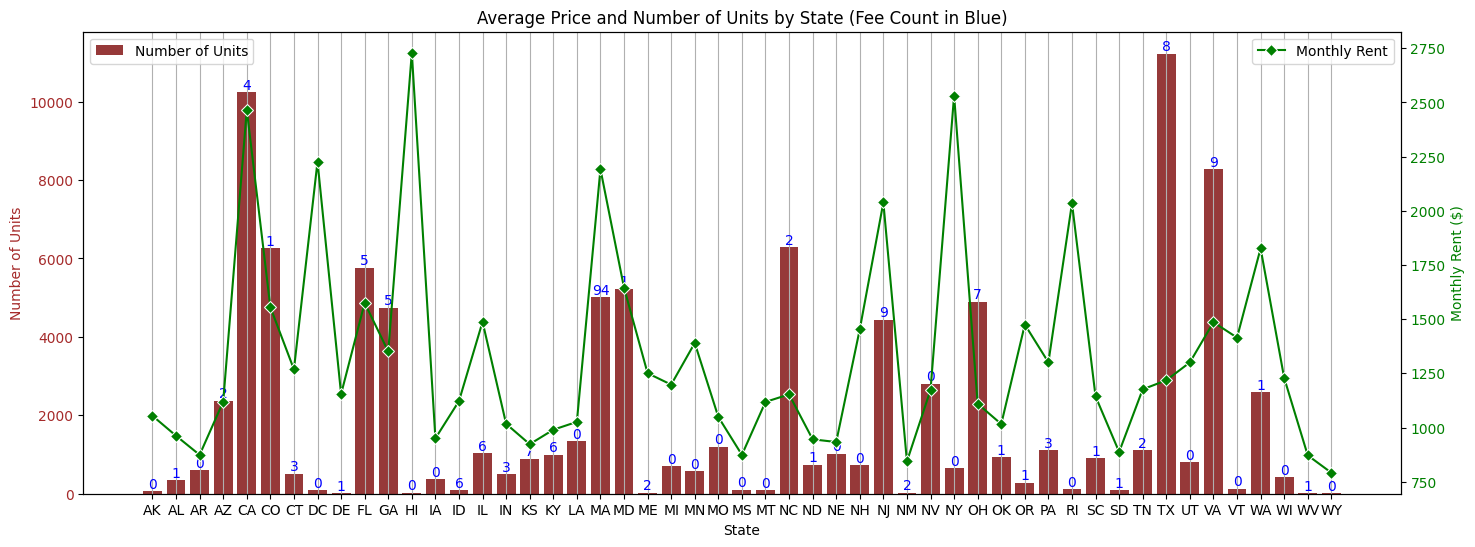

In [61]:
# stot stores total record count by state
stot = df2['State'].value_counts().sort_index()
# savg stores average rent by state
savg = df2.groupby('State')['Price ($)'].mean().round(2)
# feelabel stores count of records with fees by state
feelabel = df2.groupby('State')['Fee'].sum()

# ax11 stores seaborn object
ax11 = sns.set_style(style=None, rc=None)

# fig2 and ax11 as subplot objects
fig2, ax11 = plt.subplots(figsize=(17, 6))

plt.title('Average Price and Number of Units by State (Fee Count in Blue)')

sns.barplot(data=stot, ax=ax11, color='brown', label='Number of Units')
ax11.set_xlabel('State')
ax11.set_ylabel('Number of Units', color='brown')
ax11.tick_params(axis='y', labelcolor='brown')
ax11.bar_label(ax11.containers[0], labels=feelabel, color='blue')
plt.grid(axis='x')
plt.legend(loc='upper left')

# ax22 a shared plot with same x-axis
ax22 = ax11.twinx()

sns.lineplot(data=savg, marker='D', sort=False, ax=ax22, color='green', label='Monthly Rent')
ax22.set_ylabel('Monthly Rent ($)', color='green')
plt.legend(loc='upper right')
%pycodestyle_off
ax22.tick_params(axis='y', labelcolor='green');
%pycodestyle_on

From this graph, it would be ideal to have a lot of units for a low price/no fees. North Carolina, Texas, and Georgia seem to be ideal. Some of the worst non-ideals would be Hawaii, Massachussetts, and DC

#### 19) Does the number of amenities/pets allowed affect the monthly rent?

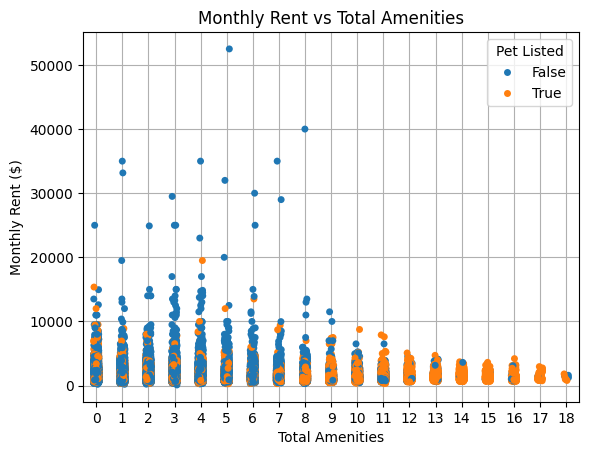

In [62]:
df2['Total Amenities'] = df2['Amenities'].apply(lambda x: len(x.split(','))
                                                if x != 'Not Listed' else 0)
sns.stripplot(data=df2, x='Total Amenities', y='Price ($)', hue='Pet Listed')
plt.ylabel('Monthly Rent ($)')
plt.grid(True)
%pycodestyle_off
plt.title('Monthly Rent vs Total Amenities');
%pycodestyle_on

From this graph, it's odd that having less amenities and not allowing pets tend to be more expensive unless pet fees are not taken into consideration in the dataset

#### 20) In Hawaii, what is the monthly rent distribution by city?

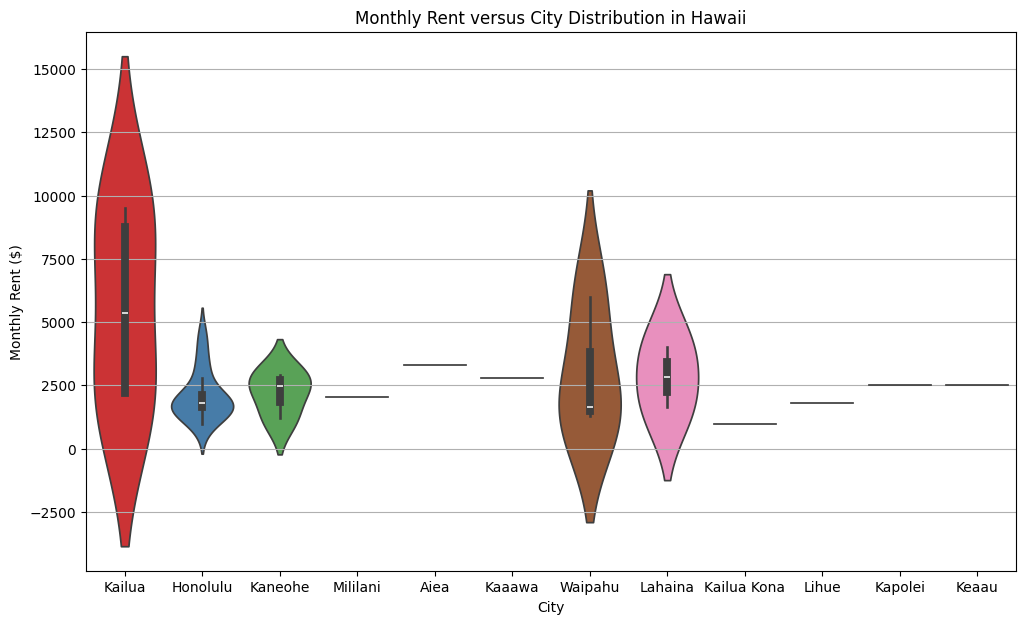

In [63]:
# df3 stores df2 mask state for Hawaii
df3 = df2.loc[df2['State'] == 'HI']
plt.figure(figsize=(12, 7))
plt.title('Monthly Rent versus City Distribution in Hawaii')
plt.ylabel('Monthly Rent ($)')
plt.grid(True)
%pycodestyle_off
sns.violinplot(data=df3, x='City', y='Price ($)',
               hue='City', palette='Set1');
%pycodestyle_on

Kailua is an expensive city to live in and there is only a handful of cities that have a decent number of units available to rent. Overall, the rent is really expensive in Hawaii, but staying in Waipahu might be the best bet due to the median being the lowest

### Additional Valuable and Exciting Insights from Dataset

#### 21) How many cities from each state have records?

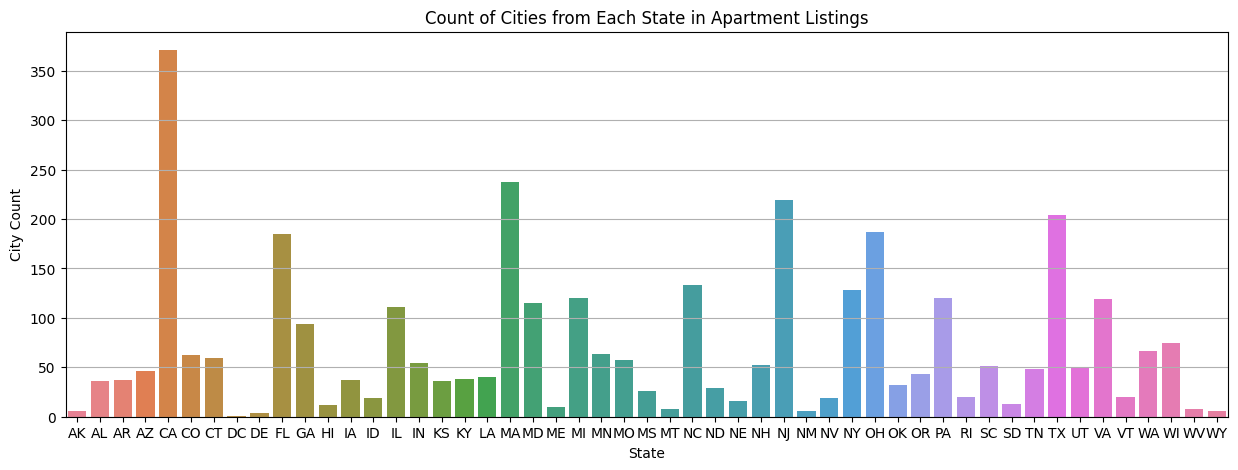

In [64]:
# grouped21 stores city counts of each state
grouped21 = df2.groupby('State',
                        as_index=False)['City'].nunique().sort_values('State')

plt.figure(figsize=(15, 5))
sns.barplot(x='State', y='City', hue='State', data=grouped21)
plt.ylabel('City Count')
plt.grid(axis='y')
%pycodestyle_off
plt.title('Count of Cities from Each State in Apartment Listings');
%pycodestyle_on

California has the most cities available to rent. It's interesting since Texas is such a large state, there are fewer cities renting apartments compared to smaller states such as Massachussetts and New Jersey. Furthermore, large states such as Arizona and Nevada do not have a lot of cities renting apartments

#### 22) Monthly rent in 10 random Californian Cities 2009 and 2024 comparison assuming 8.85% increase per year?

https://ipropertymanagement.com/research/average-rent-by-year

In [65]:
df2['2024 Price ($)'] = df2['Price ($)'].apply(lambda x:
                                               x*np.power(1.0885,
                                                          2024-2009).round(2))
df2[df2['State'] == 'CA'][['Price ($)', '2024 Price ($)', 'City',
                           'BR Totals', 'Total Amenities',
                           'Square Footage']].sample(10)

,Price ($),2024 Price ($),City,BR Totals,Total Amenities,Square Footage
69100,3350.0,11959.50,San Diego,4,5,987
29375,3097.0,11056.29,Santa Monica,2,3,612
95242,1770.0,6318.90,Carlsbad,4,12,846
89399,4385.0,15654.45,Irvine,4,5,1589
41948,2644.0,9439.08,Los Angeles,2,1,1000
94953,2210.0,7889.70,Tustin,4,1,965
81390,1050.0,3748.50,Sacramento,2,0,580
41965,2715.0,9692.55,Los Angeles,4,6,950
69043,2130.0,7604.10,San Diego,2,1,767
90295,2446.0,8732.22,San Jose,2,5,730


#### 23) Are there significant correlations between all numeric variables?

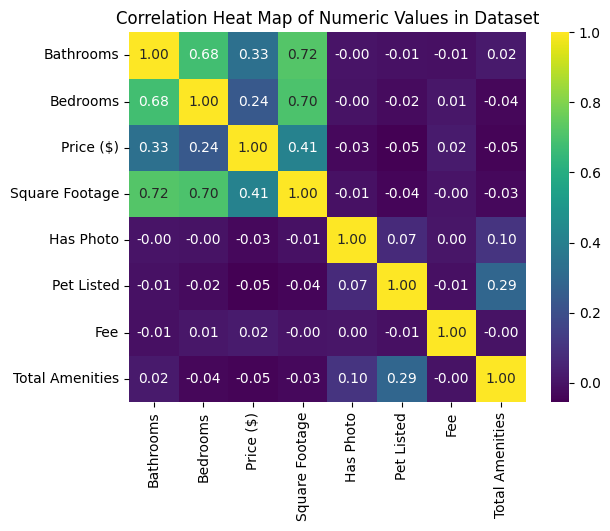

In [66]:
# dfcorr store correlation dataframe of df2 numeric features
dfcorr = df2[['Bathrooms', 'Bedrooms', 'Price ($)',
              'Square Footage', 'Has Photo', 'Pet Listed',
              'Fee', 'Total Amenities']].corr()
plt.title('Correlation Heat Map of Numeric Values in Dataset')
%pycodestyle_off
sns.heatmap(dfcorr, annot=True, fmt='0.2f', cmap='viridis');
%pycodestyle_on

Bedrooms, Bathrooms, and Square Footage are the most correlated with one another which makes sense. The more bathrooms and bedrooms you have the more square footage needed and the more bedrooms an apartment has, there needs to be more bathrooms as well.

#### 24) Total records from source along with the average rent and distributions?

In [67]:
# df24 stores a copy of df2
df24 = df2.copy()
# vc24 stores total records from each source
vc24 = pd.DataFrame(df24['Source'].value_counts())
# group24 stores average rent by source
group24 = pd.DataFrame(df24.groupby('Source')
                       ['Price ($)'].mean().round(2))
# merge24 stores vc24 and group24 merge
merge24 = vc24.merge(group24, on='Source')
merge24.reset_index(inplace=True)
%pycodestyle_off
merge24.rename(columns={'count':'Total Records'}, inplace=True)
%pycodestyle_on
merge24

,Source,Total Records,Price ($)
0,RentDigs.com,90411,1531.26
1,RentLingo,6809,1467.08
2,ListedBuy,550,1143.34
3,GoSection8,428,1042.80
4,RealRentals,267,2195.18
5,tenantcloud,121,1073.85
6,BostonApartments,92,2955.46
7,RENTCafé,41,1891.59
8,Listanza,25,2036.76
9,RENTOCULAR,18,2163.94


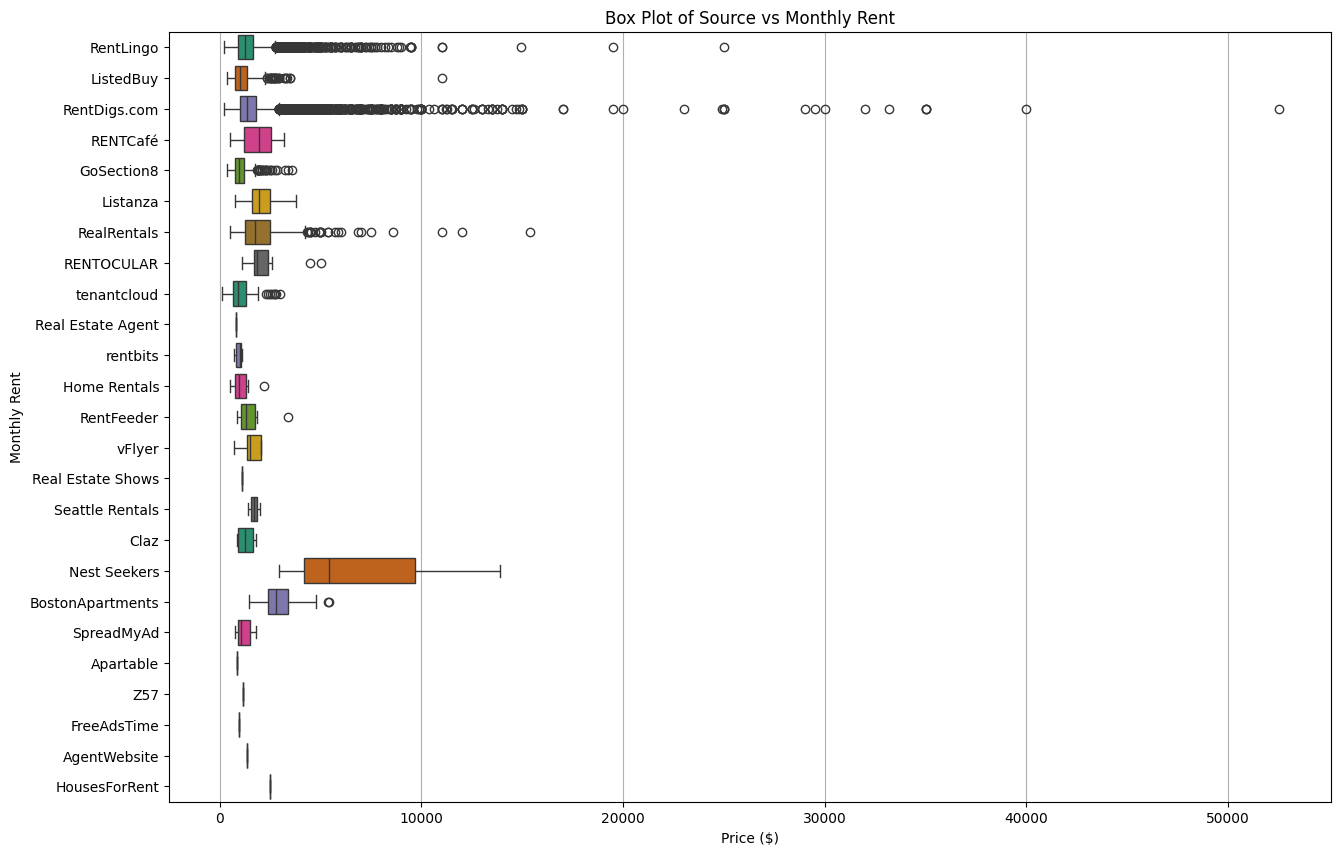

In [68]:
plt.figure(figsize=(15, 10))
plt.title('Box Plot of Source vs Monthly Rent')
plt.ylabel('Monthly Rent')
plt.grid(True)
%pycodestyle_off
sns.boxplot(data=df2, y='Source', x='Price ($)', orient='h',
            hue='Source', palette='Dark2');
%pycodestyle_on

In the boxplot, RentDigs and Rentlingo have many outliers, but this makes sense because these two websites make up a majority of the listings in the dataset. Looking at the distribution and knowing the number of records coming from each source, it's inconclusive if one website is better than another.

#### 25) What are the average square footages by state?

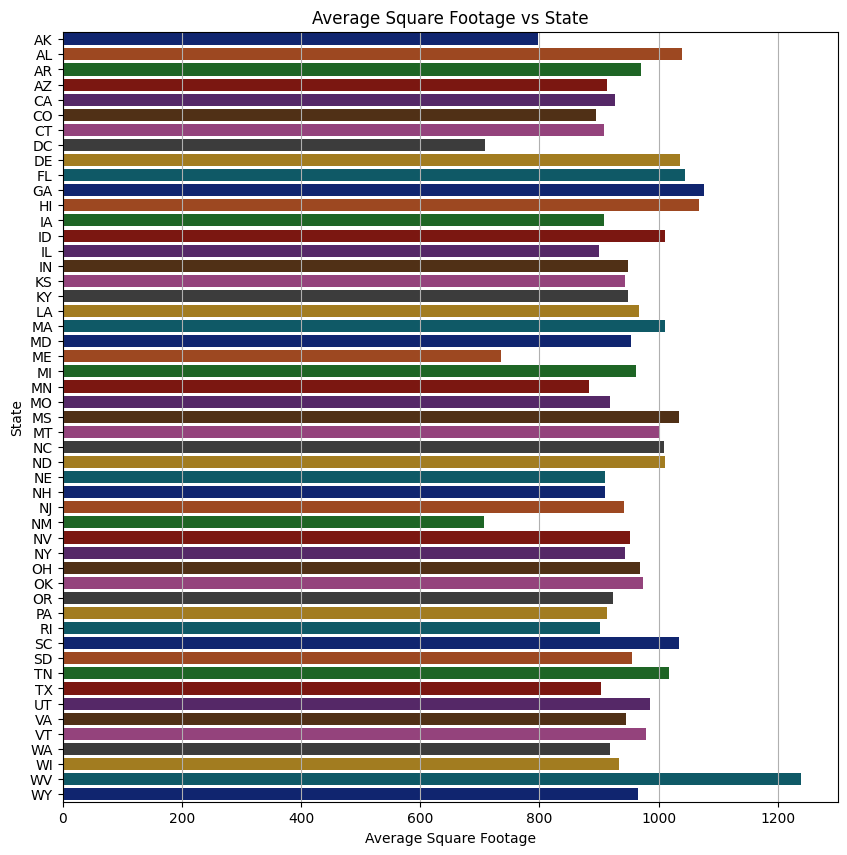

In [69]:
# stsq stores df2 groupby of mean square footage by state
stsq = df2.groupby(df2['State'], as_index=False)['Square Footage'].mean()

plt.figure(figsize=(10, 10))
sns.barplot(data=stsq, y='State', x='Square Footage', orient='h',
            hue='State', palette='dark', legend=False)
plt.xlabel('Average Square Footage')
plt.ylabel('State')
plt.grid(axis='x')
%pycodestyle_off
plt.title('Average Square Footage vs State');
%pycodestyle_on

West Virginia listings on average will provide the most square footage compared to the other states, Alaska/New Mexico/DC/Maine will provide the least on average (less than 800 square foot). The other states tend to have listings above 800 square foot on average

-------------------------

## Conclusion

Ideal areas and times to rent an apartment or when to put an apartment for rent

State Insights:
- Apartments for < $2000 a month mainly in southern CA
- HI, NY, CA, DC, MA are extremely expensive states to rent in
- NC, TX, and GA seem to be the most ideal states to rent in
- MA has several records that have a fee
- CA has the most cities available to rent. TX, NV, and AZ have fewer cities renting apartments compared to smaller states such as MA and NJ
- WV will provide the most square footage on average, but NM will provide the least on average 

Apartment Insights:
- Pets allowed on average is less costly than not having pets
- RentDigs and RentLingo make up the majority of listings across all records/states
- The top 10 Cities that have the most listings, make up ~16% of the dataset

Business Insights:
- December to March and August to October best times to find an apartment, April to June best time to charge
- < 0.05% of records meet the average of a family in America home
- Two of the listings needs to be investigated for violation of housing laws
- Rental prices in 2024 vs 2009 are drastically different, and unfortunately not unreasonable estimates

Further Analysis:
- Bias
- Records in 2024
- Investigate legality of records
- Other sources
- Do trends hold true today